Parallel Slop Linear Regression


In [1]:
import pandas as pd

df_fish = pd.read_csv('fish.csv')
df_fish.groupby('species').mean()

,mass_g,length_cm
species,,
Bream,617.828571,30.305714
Perch,382.239286,25.735714
Pike,718.705882,42.476471
Roach,152.050000,20.645000


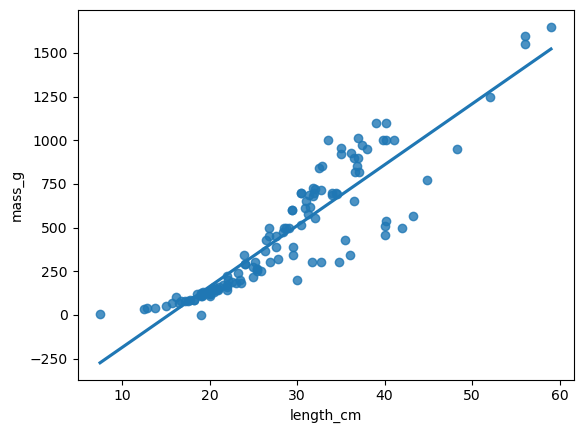

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='length_cm', y='mass_g', data=df_fish, ci= None)
plt.show()

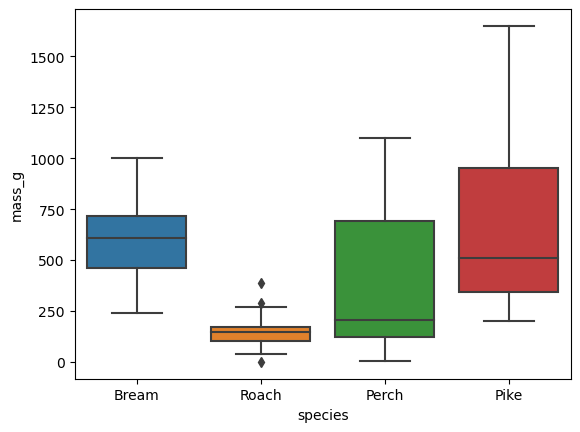

In [3]:
sns.boxplot(y='mass_g',x='species',data=df_fish)
plt.show()

In [4]:
from statsmodels.formula.api import ols

mdl_peso_long = ols('mass_g~length_cm', data=df_fish).fit()
mdl_peso_specie = ols('mass_g~species+0', data=df_fish).fit()
mdl_both = ols('mass_g~length_cm+species+0', data=df_fish).fit()
mdl_both.params

species[Bream]    -672.241866
species[Perch]    -713.292859
species[Pike]    -1089.456053
species[Roach]    -726.777799
length_cm           42.568554
dtype: float64

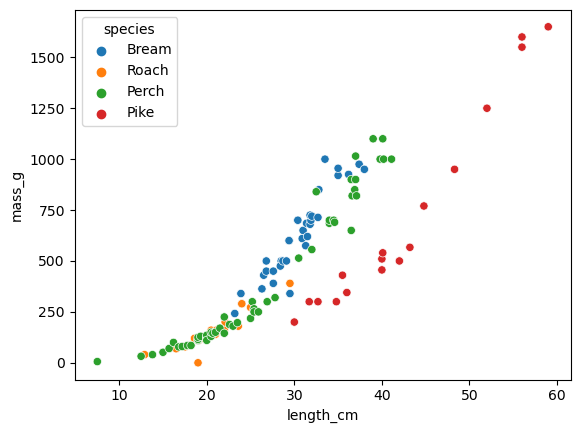

In [5]:
sns.scatterplot(x='length_cm', y='mass_g', hue='species', data=df_fish)
plt.show()

In [6]:
coeff = mdl_both.params

sp_bream, sp_perch, sp_pike, sp_roach, pend = coeff


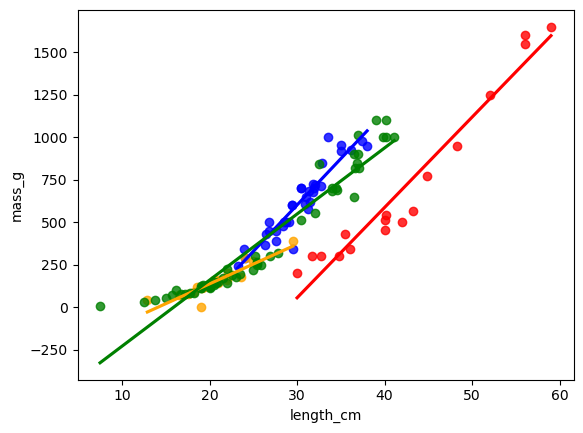

In [7]:

sns.regplot(x='length_cm', y='mass_g', color='Blue', ci=None, data=df_fish[df_fish['species']=='Bream'])
sns.regplot(x='length_cm', y='mass_g', color='Orange', ci=None, data=df_fish[df_fish['species']=='Roach'])
sns.regplot(x='length_cm', y='mass_g', color='Red', ci=None, data=df_fish[df_fish['species']=='Pike'])  
sns.regplot(x='length_cm', y='mass_g', color='Green', ci=None, data=df_fish[df_fish['species']=='Perch'])           
plt.show()

In [8]:

df = pd.DataFrame({'species':['Pike'], 'length_cm':[55]})

df_predicted = df.assign(predicted_mass_g = mdl_both.predict(df))

df_predicted.head()

,species,length_cm,predicted_mass_g
0,Pike,55,1251.814421


In [9]:
from itertools import product
import numpy as np
lengths = np.arange(10,70,5)
species = df_fish['species'].unique()

comb = product(lengths,species)

df = pd.DataFrame(comb,columns=['length_cm','species'])
df_predicted = df.assign(mass_g=mdl_both.predict(df))

df_predicted.head()

,length_cm,species,mass_g
0,10,Bream,-246.556325
1,10,Roach,-301.092258
2,10,Perch,-287.607319
3,10,Pike,-663.770512
4,15,Bream,-33.713555


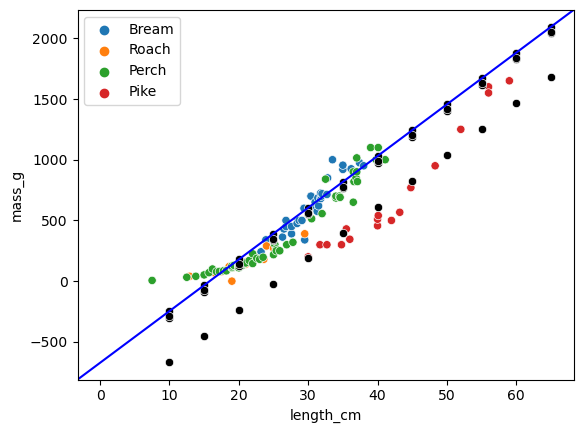

In [14]:
plt.axline(xy1=(0,sp_bream),slope=pend, color='blue')
sns.scatterplot(x='length_cm', y='mass_g', hue='species', data=df_fish)
sns.scatterplot(x='length_cm', y='mass_g', color='black', data=df_predicted)          
plt.show()

In [11]:
print(np.sqrt(mdl_both.mse_resid))
print(np.sqrt(mdl_peso_long.mse_resid))
print(np.sqrt(mdl_peso_specie.mse_resid))

103.35563303966488
152.12092835414788
313.55011566825925


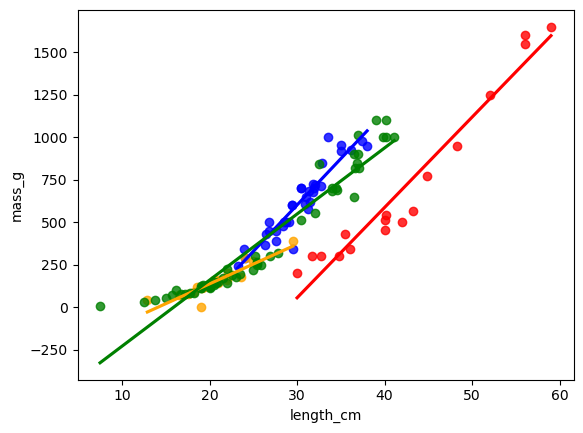

In [12]:

sns.regplot(x='length_cm', y='mass_g', color='Blue', ci=None, data=df_fish[df_fish['species']=='Bream'])
sns.regplot(x='length_cm', y='mass_g', color='Orange', ci=None, data=df_fish[df_fish['species']=='Roach'])
sns.regplot(x='length_cm', y='mass_g', color='Red', ci=None, data=df_fish[df_fish['species']=='Pike'])  
sns.regplot(x='length_cm', y='mass_g', color='Green', ci=None, data=df_fish[df_fish['species']=='Perch'])           
plt.show()

In [13]:
mdl_bream = ols('mass_g~length_cm', data=df_fish[df_fish['species']=='Bream']).fit()
mdl_perch = ols('mass_g~length_cm', data=df_fish[df_fish['species']=='Perch']).fit()
mdl_pike = ols('mass_g~length_cm', data=df_fish[df_fish['species']=='Pike']).fit()
mdl_roach = ols('mass_g~length_cm', data=df_fish[df_fish['species']=='Roach']).fit()

print(np.sqrt(mdl_bream.mse_resid))
print(np.sqrt(mdl_perch.mse_resid))
print(np.sqrt(mdl_pike.mse_resid))
print(np.sqrt(mdl_roach.mse_resid))
print(np.sqrt(mdl_both.mse_resid))

74.15224261594197
100.1801784079005
119.93765911860488
38.17839823024125
103.35563303966488
